将TerraSAR-X影像相互配准。需要安装isce2环境。

根据自己的文件路径写好`main.xml`和`main.py`两个文件，然后运行`main.py`启动isce2。

In [ ]:
<!-- main.xml -->
<stripmapApp>
  <component name="stripmapApp">
    <property name="sensor name">TERRASARX</property>
    <component name="reference">
      <property name="xml">/home/data/0219/TDX1_SAR__SSC______SM_S_SRA_20190117T100449_20190117T100457/TSX-1.SAR.L1B/TDX1_SAR__SSC______SM_S_SRA_20190117T100449_20190117T100457/TDX1_SAR__SSC______SM_S_SRA_20190117T100449_20190117T100457.xml</property>
      <property name="OUTPUT">0117</property>
    </component>
    <component name="secondary">
      <property name="xml">/home/data/1112/TDX1_SAR__SSC______SM_S_SRA_20181112T100452_20181112T100500/TSX-1.SAR.L1B/TDX1_SAR__SSC______SM_S_SRA_20181112T100452_20181112T100500/TDX1_SAR__SSC______SM_S_SRA_20181112T100452_20181112T100500.xml</property>
      <property name="OUTPUT">1112</property>
    </component>
  </component>
</stripmapApp>

In [ ]:
# main.py
from isce.applications.stripmapApp import Insar
import os
os.chdir("/home/data/1112")

a = Insar(name="stripmapApp", cmdline=["/home/data/1112/main.xml","--end=refined_resample"])
a.configure()
a.run()

文件夹的含义如下

- offsets: 将辅影像转换到主影像的坐标系后，原坐标减去新坐标的差。此时新坐标相当于主影像的像元坐标。
- misreg: ampcor配准后，原坐标减去新坐标的差。注意此时原坐标相当于offsets中的新坐标，所以差通常不到1像素。
- geometry: 主影像上每一点的经纬度和高程。
- coregisteredSlc: coarse_coreg是未ampcor，仅转换坐标系后的采样结果；refined_coreg是ampcor后的采样结果。

所以其中真正重要的仅有misreg的结果。offsets的结果与之前的几何定位结果一致。

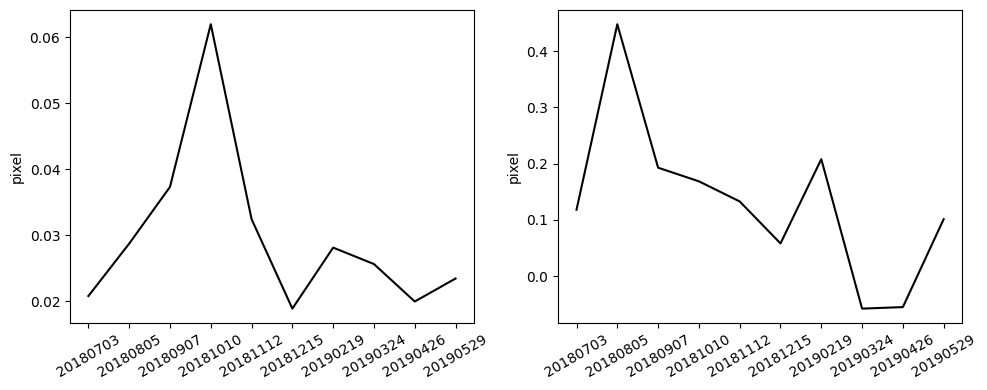

In [1]:
import sys
sys.path.append("..")
import os
os.chdir("..")
from lxml import etree
import numpy as np
import matplotlib.pyplot as plt


def read(date):
    az = float(etree.parse("data/misreg/%s/misreg_az.xml" % date).find("./component[@name='instance']/property[@name='coeffs']/value").text[2:-2])
    rg = float(etree.parse("data/misreg/%s/misreg_rg.xml" % date).find("./component[@name='instance']/property[@name='coeffs']/value").text[2:-2])
    return az, rg

def main():
    labels = ("20180703", "20180805", "20180907", "20181010", "20181112", "20181215", "20190219", "20190324","20190426", "20190529")
    y = np.array([read(i) for i in labels]).T
    x = range(y.shape[1])
    
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(x, y[0], c="black")
    plt.xticks(x, labels, rotation=30)
    plt.ylabel("pixel")
    plt.subplot(1,2,2)
    plt.plot(x, y[1], c="black")
    plt.xticks(x,  labels, rotation=30)
    plt.ylabel("pixel")
    plt.tight_layout()
    plt.show()


main()